In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd, os, numpy as np, scipy

In [2]:
allfiles = os.listdir('./data/normdatadump/')

In [3]:
f,ax = plt.subplots()
for i in allfiles:
    x = pd.read_csv('./data/normdatadump/'+i,sep = '\t')
    x = x.iloc[:,1:]
    ax.plot(x)

Error in callback <function flush_figures at 0x7f6387cc9c80> (for post_execute):


KeyboardInterrupt: 

In [4]:
x

,RHX,RHY,RHZ,LHX,LHY,LHZ
0,-210.605560,-220.002749,845.158001,-240.337708,309.481614,851.353604
1,-204.679620,-219.393415,847.117801,-235.017431,307.660688,854.426793
2,-198.816781,-218.083260,848.919376,-229.886605,306.111960,857.915341
3,-193.065578,-216.021728,850.311386,-225.074532,306.024066,862.064992
4,-187.315968,-213.959005,851.621049,-220.097975,305.657752,865.971581
5,-181.597150,-213.298887,854.117106,-215.051064,305.674812,869.901780
6,-176.102218,-213.264452,857.131538,-209.984359,305.678845,873.830537
7,-170.601075,-213.434621,860.145415,-204.959963,305.583407,877.797266
8,-165.240540,-213.461175,863.407121,-199.985667,305.497203,881.843530
9,-160.084584,-213.534198,866.982601,-195.208213,305.310423,886.114725


# Readme for Norm Data Dump

# Resample Normdatadump into smaller chunks

# Audio features which:
## - you can subsample
## - can be compressed further
## - are meaningful for a neural net like this
## - are used in literature for nns

## Resample to 300 samples

In [5]:
import noise    

In [6]:
help(noise)

Help on package noise:

NAME
    noise - Noise functions for procedural generation of content

DESCRIPTION
    Contains native code implementations of Perlin improved noise (with
    fBm capabilities) and Perlin simplex noise. Also contains a fast
    "fake noise" implementation in GLSL for execution in shaders.
    
    Copyright (c) 2008, Casey Duncan (casey dot duncan at gmail dot com)

PACKAGE CONTENTS
    _perlin
    _simplex
    perlin
    setup
    shader
    shader_noise
    test

FUNCTIONS
    pnoise1 = noise1(...)
        noise1(x, octaves=1, persistence=0.5, lacunarity=2.0, repeat=1024, base=0.0)
        
        1 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise2 = noise2(...)
        noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
        
        2 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise3 = noise3(...)
        noise3(x, y, z, octaves=1, persist

In [7]:
a = np.asarray(x['LHX'])
b = np.asarray(x['LHY'])
c = np.asarray(x['LHZ'])

In [8]:
a.shape

(600,)

In [9]:
y = np.random.rand(500)
y.shape

(500,)

In [10]:
for i in range(20):
    print(10*noise.pnoise3(a[i],b[i],c[i]))

-0.26948049664497375
0.3777220845222473
-0.1982128620147705
-1.3521549105644226
-3.9958253502845764
-2.399495840072632
-0.061283111572265625
4.016987085342407
5.278752446174622
4.4756704568862915
-1.8586021661758423
-2.2349119186401367
-7.220597863197327
-1.2272833287715912
-3.5769325494766235
0.4719211161136627
5.646157264709473
-3.625229001045227
-1.6354858875274658
-1.552666425704956


In [11]:
a[i]

-164.201406547

## Add noise to a pd

In [12]:
x

,RHX,RHY,RHZ,LHX,LHY,LHZ
0,-210.605560,-220.002749,845.158001,-240.337708,309.481614,851.353604
1,-204.679620,-219.393415,847.117801,-235.017431,307.660688,854.426793
2,-198.816781,-218.083260,848.919376,-229.886605,306.111960,857.915341
3,-193.065578,-216.021728,850.311386,-225.074532,306.024066,862.064992
4,-187.315968,-213.959005,851.621049,-220.097975,305.657752,865.971581
5,-181.597150,-213.298887,854.117106,-215.051064,305.674812,869.901780
6,-176.102218,-213.264452,857.131538,-209.984359,305.678845,873.830537
7,-170.601075,-213.434621,860.145415,-204.959963,305.583407,877.797266
8,-165.240540,-213.461175,863.407121,-199.985667,305.497203,881.843530
9,-160.084584,-213.534198,866.982601,-195.208213,305.310423,886.114725


In [13]:
def createnoise():
    newnoise = []
    for i in range(600):
        newnoise.append(10*noise.pnoise1(a[i]))
    newnoise = np.asarray(newnoise)
    return(newnoise)

In [14]:
createnoise()

array([ 2.20506787e+00,  7.09228544e-02,  2.73138940e+00, -1.38936624e+00,
       -4.17885073e-01,  1.99356806e-01, -6.27058325e-02, -1.57740470e-01,
       -5.78778284e-02,  5.75158112e-01, -3.66201415e-02, -9.30620432e-01,
       -3.49248499e+00, -1.62347987e+00, -2.52560228e-01,  1.49748966e+00,
        5.21472469e-01, -6.60820425e+00, -6.57426178e+00, -3.97883058e+00,
        4.11999315e+00,  5.98573267e+00,  1.78905968e-01, -2.13001773e+00,
       -2.98441891e-01,  2.52965182e+00, -1.95806980e+00,  1.75827250e+00,
       -3.36897187e-01, -2.55972892e+00,  1.84702218e+00,  1.70900255e+00,
       -2.63978451e+00, -2.83455163e+00,  6.20637059e+00,  9.78736859e-02,
       -1.63314015e+00, -1.91894189e+00, -1.22914091e+00, -8.68576542e-01,
       -1.98177651e+00,  4.20173667e-01,  3.84101868e-01,  1.99946880e+00,
        2.13405620e-01,  5.80224156e+00, -1.05945401e+00, -3.41541857e+00,
        3.65571980e-02,  2.37692833e+00,  3.81278157e+00,  1.67590138e-01,
        7.21349707e-02, -

In [18]:
for file in allfiles:
    x = pd.read_csv('./data/normdatadump/'+file,sep = '\t')
    x = x.iloc[:,1:]
    arr = []
    for i in range(6):
        a = x.iloc[:,i]+ createnoise()
        arr.append(a)
    arr = pd.DataFrame(arr).T
    arr.to_csv('./data/augdata/pnoise1Add/'+file)

In [36]:
x

,RHX,RHY,RHZ,LHX,LHY,LHZ
0,306.912455,-118.810882,932.807951,306.198458,234.749232,898.401166
1,303.451742,-113.262812,935.026662,308.395589,230.812547,893.796180
2,297.693028,-110.336999,932.659283,307.930369,230.656535,887.272661
3,291.957027,-109.237837,928.731321,305.625698,233.492450,881.738696
4,285.938043,-109.044115,925.092112,301.631978,234.840765,878.886869
5,279.544613,-109.340680,922.194081,304.903663,229.825406,881.143606
6,281.834443,-114.421825,924.782866,307.545634,228.655342,886.440129
7,287.424990,-118.309741,926.643472,306.002186,233.707158,890.591761
8,292.872731,-122.290576,928.489152,301.783294,238.136901,893.000330
9,297.885406,-126.791300,930.652452,296.131369,241.422232,894.461515


In [35]:
arr

[]

In [60]:
np.array(x.iloc[:,:1].transpose)

array(<bound method DataFrame.transpose of             RHX
0    306.912455
1    303.451742
2    297.693028
3    291.957027
4    285.938043
..          ...
595  258.726338
596  260.282124
597  261.862840
598  264.264656
599  268.769372

[600 rows x 1 columns]>, dtype=object)

array(<generator object <genexpr> at 0x7f63077f6990>, dtype=object)

In [155]:
RHX, RHY, RHZ, LHX, LHY, LHZ = [],[],[],[],[],[]
for file in allfiles:
    x = pd.read_csv('./data/normdatadump/'+file,sep = '\t')
    x = x.iloc[:,1:]
    RHX.append(x.iloc[:,:1].to_numpy())
    RHY.append(x.iloc[:,:2].to_numpy())
    RHZ.append(x.iloc[:,:3].to_numpy())
    LHX.append(x.iloc[:,:4].to_numpy())
    LHY.append(x.iloc[:,:5].to_numpy())
    LHZ.append(x.iloc[:,:6].to_numpy())

In [156]:
for file in allfiles:
    x = pd.read_csv('./data/augdata/pnoise1Add/'+file,sep = '\t')
    x = x.iloc[:,1:]
    RHX.append(x.iloc[:,:1].to_numpy())
    RHY.append(x.iloc[:,:2].to_numpy())
    RHZ.append(x.iloc[:,:3].to_numpy())
    LHX.append(x.iloc[:,:4].to_numpy())
    LHY.append(x.iloc[:,:5].to_numpy())
    LHZ.append(x.iloc[:,:6].to_numpy())

In [138]:
x = RHX
y = RHY
z = RHZ

In [154]:
y

[array([[ 303.45174245, -113.26281169],
        [ 297.69302804, -110.3369989 ],
        [ 291.95702672, -109.23783728],
        ...,
        [ 261.86284008, -280.90115582],
        [ 264.26465574, -281.77316598],
        [ 268.76937215, -283.10708285]]),
 array([[ 276.23623146,  -47.70778593],
        [ 278.45264052,  -51.33421975],
        [ 280.34588386,  -55.24267546],
        ...,
        [ 326.47141423, -121.96141829],
        [ 322.67430465, -119.78837044],
        [ 318.8453505 , -117.43237233]]),
 array([[ 516.98194874, -484.0159175 ],
        [ 520.88064507, -484.58576521],
        [ 524.59241141, -485.08594196],
        ...,
        [ 680.16304346, -240.26533017],
        [ 679.36484062, -241.06550653],
        [ 678.33901757, -241.55354617]]),
 array([[279.47078974, -93.57891429],
        [281.76532257, -95.98379018],
        [283.98609814, -98.36767619],
        ...,
        [414.89413382, -93.56538796],
        [410.8779644 , -90.86573771],
        [406.58856658, -88.83088

AttributeError: 'list' object has no attribute 'has_data'

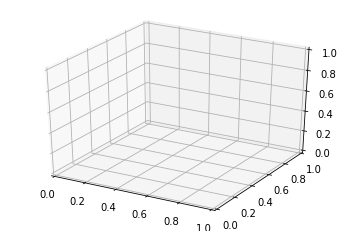

In [141]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(x,y,z)

In [109]:
from scipy import stats
from mayavi import mlab

x = np.array(RHX, dtype = 'float')
y = np.array(RHY, dtype = 'float')
z = np.array(RHZ, dtype = 'float')

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)
density = kde(xyz)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

ValueError: setting an array element with a sequence.

In [173]:
import numpy as np
from scipy import stats
from mayavi import mlab

mu, sigma = 0, 0.1 
x = 10*np.random.normal(mu, sigma, 5000)
y = 10*np.random.normal(mu, sigma, 5000)
z = 10*np.random.normal(mu, sigma, 5000)

xyz = np.vstack([x,y,z])
kde = stats.gaussian_kde(xyz)
density = kde(xyz)

# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x, y, z, density, scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

In [177]:
np.concatenate

TypeError: The first input argument needs to be a sequence